# Section I. Main

### Load libraries, functions, palette, theme

In [1]:
# load libraries and palette
%run __libraries.ipynb

In [2]:
# load functions
# from __functions import *
%run __functions.ipynb

In [3]:
# start stopwatch
start = stopwatch_start()

### Variables

In [4]:
path_img = 'docs/img/'

In [5]:
path_files = 'files'

In [6]:
path_excel_csv = 'excel-csv'

### Load Files

In [7]:
economics_data = loadit('economics_data', path=path_files, create_empty_dict=True)

# Consumer prices growth

In [8]:
prices_producers_agriculture = economics_data['prices_producers_agriculture'].copy()

In [9]:
prices_consumers = economics_data['prices_consumers'].copy()

В 2022 году изменена номенклатура для хлеба.  

В 2021:
- хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг
- хлеб и булочные изделия из пшеничной муки высшего сорта, кг


В 2022:
- хлеб и булочные изделия из пшеничной муки различных сортов, кг

В конечном итоге, цена для 2021 года считается как средняя от  'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг' 
и 'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'. На графике цена за 2021 год обозначены светлым тоном.

In [10]:
prices_producers_columns = [
    'пшеница', 'крупный рогатый скот', 'свиньи', 'птица сельскохозяйственная живая',
    'молоко сырое крупного рогатого скота', 'овощи', 'яйца куриные в скорлупе свежие'
]

In [11]:
prices_consumers_columns = [
    'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг', 
    'хлеб и булочные изделия из пшеничной муки высшего сорта, кг',
    'хлеб и булочные изделия из пшеничной муки различных сортов, кг',
    'говядина (кроме бескостного мяса), кг', 'говядина бескостная, кг',
    'свинина (кроме бескостного мяса), кг', 'свинина бескостная, кг',
    'куры охлажденные и мороженые, кг', 
    'молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л',
    'сыры сычужные твердые и мягкие, кг', 'сыры твердые, полутвердые и мягкие, кг',
    'сметана, кг', 'йогурт, 125 г', 'йогурт, кг', 'масло сливочное, кг', 
    'творог нежирный, кг', 'творог жирный, кг',
    'картофель, кг', 'огурцы свежие, кг', 'помидоры свежие, кг',
    'лук репчатый, кг', 'морковь, кг',
    'яйца куриные, 10 шт.'
]

In [12]:
prices_producers_food = prices_producers_agriculture[prices_producers_columns].copy()

In [13]:
prices_consumers_food = prices_consumers[prices_consumers_columns].copy()

## Food Dataset

In [15]:
prices_food = pd.DataFrame()

### Хлеб

##### Производители

In [16]:
prices_food = pd.concat(
    [prices_food, prices_producers_food['пшеница'] ;], axis=1
)

##### Потребители

In [19]:
bread_2021 = pd.concat(
    [prices_consumers_food['хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг'],
    prices_consumers_food['хлеб и булочные изделия из пшеничной муки высшего сорта, кг']],
    axis=1
)
bread_2021 = bread_2021.mean(axis=1)

In [35]:
bread = pd.concat([
    bread_2021.dropna(),
    prices_consumers_food['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].dropna()
])

In [38]:
bread.name = 'Хлеб'

In [39]:
prices_food = pd.concat(
    [prices_food, bread], axis=1
)

In [40]:
prices_food

,пшеница,Хлеб
January 2021,14810.0,70.36
February 2021,14974.0,70.655
March 2021,14095.0,71.13
April 2021,13317.0,71.715
May 2021,13140.0,72.145
June 2021,13415.0,72.53
July 2021,13179.0,72.805
August 2021,12826.0,73.14
September 2021,14173.0,73.55
October 2021,14705.0,74.695


In [33]:
bread.index

Index(['January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021',
       'June 2021', 'July 2021', 'August 2021', 'September 2021',
       'October 2021', 'November 2021', 'December 2021', 'January 2022',
       'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
       'July 2022', 'August 2022', 'September 2022', 'October 2022',
       'November 2022', 'December 2022', 'January 2023', 'February 2023',
       'March 2023', 'April 2023', 'May 2023', 'June 2023', 'July 2023',
       'August 2023', 'September 2023', 'October 2023', 'November 2023',
       'December 2023', 'January 2024', 'February 2024', 'March 2024',
       'April 2024', 'January 2021', 'February 2021', 'March 2021',
       'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021',
       'September 2021', 'October 2021', 'November 2021', 'December 2021',
       'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022',
       'June 2022', 'July 2022', 'August 2022',

In [37]:
bread

January 2021       70.36
February 2021     70.655
March 2021         71.13
April 2021        71.715
May 2021          72.145
June 2021          72.53
July 2021         72.805
August 2021        73.14
September 2021     73.55
October 2021      74.695
November 2021      76.23
December 2021      77.24
January 2022       76.62
February 2022      77.43
March 2022         80.83
April 2022         83.07
May 2022           83.94
June 2022           84.6
July 2022          84.54
August 2022        84.83
September 2022     85.07
October 2022       85.08
November 2022      85.05
December 2022      85.21
January 2023       85.23
February 2023      85.38
March 2023         85.55
April 2023         85.92
May 2023           85.91
June 2023          86.03
July 2023          86.09
August 2023        86.31
September 2023     87.22
October 2023       88.65
November 2023      90.09
December 2023      90.76
January 2024       92.03
February 2024      92.41
March 2024         92.63
April 2024         93.77


In [24]:
bread_2021

January 2021       70.36
February 2021     70.655
March 2021         71.13
April 2021        71.715
May 2021          72.145
June 2021          72.53
July 2021         72.805
August 2021        73.14
September 2021     73.55
October 2021      74.695
November 2021      76.23
December 2021      77.24
January 2022         NaN
February 2022        NaN
March 2022           NaN
April 2022           NaN
May 2022             NaN
June 2022            NaN
July 2022            NaN
August 2022          NaN
September 2022       NaN
October 2022         NaN
November 2022        NaN
December 2022        NaN
January 2023         NaN
February 2023        NaN
March 2023           NaN
April 2023           NaN
May 2023             NaN
June 2023            NaN
July 2023            NaN
August 2023          NaN
September 2023       NaN
October 2023         NaN
November 2023        NaN
December 2023        NaN
January 2024         NaN
February 2024        NaN
March 2024           NaN
April 2024           NaN


In [25]:
prices_consumers_food['хлеб и булочные изделия из пшеничной муки различных сортов, кг']

January 2021        NaN
February 2021       NaN
March 2021          NaN
April 2021          NaN
May 2021            NaN
June 2021           NaN
July 2021           NaN
August 2021         NaN
September 2021      NaN
October 2021        NaN
November 2021       NaN
December 2021       NaN
January 2022      76.62
February 2022     77.43
March 2022        80.83
April 2022        83.07
May 2022          83.94
June 2022          84.6
July 2022         84.54
August 2022       84.83
September 2022    85.07
October 2022      85.08
November 2022     85.05
December 2022     85.21
January 2023      85.23
February 2023     85.38
March 2023        85.55
April 2023        85.92
May 2023          85.91
June 2023         86.03
July 2023         86.09
August 2023       86.31
September 2023    87.22
October 2023      88.65
November 2023     90.09
December 2023     90.76
January 2024      92.03
February 2024     92.41
March 2024        92.63
April 2024        93.77
Name: хлеб и булочные изделия из пшеничн

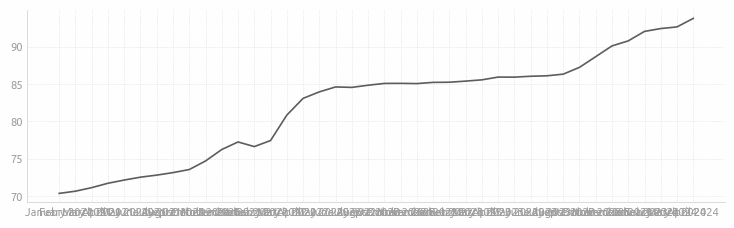

In [36]:
plt.plot(bread)

In [20]:
bread_2021

January 2021       70.36
February 2021     70.655
March 2021         71.13
April 2021        71.715
May 2021          72.145
June 2021          72.53
July 2021         72.805
August 2021        73.14
September 2021     73.55
October 2021      74.695
November 2021      76.23
December 2021      77.24
January 2022         NaN
February 2022        NaN
March 2022           NaN
April 2022           NaN
May 2022             NaN
June 2022            NaN
July 2022            NaN
August 2022          NaN
September 2022       NaN
October 2022         NaN
November 2022        NaN
December 2022        NaN
January 2023         NaN
February 2023        NaN
March 2023           NaN
April 2023           NaN
May 2023             NaN
June 2023            NaN
July 2023            NaN
August 2023          NaN
September 2023       NaN
October 2023         NaN
November 2023        NaN
December 2023        NaN
January 2024         NaN
February 2024        NaN
March 2024           NaN
April 2024           NaN


In [17]:
prices_consumers_food['хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг']

January 2021      56.07
February 2021     56.23
March 2021        56.57
April 2021        56.98
May 2021          57.25
June 2021         57.65
July 2021            58
August 2021       58.38
September 2021    58.77
October 2021      59.62
November 2021     61.06
December 2021     61.81
January 2022        NaN
February 2022       NaN
March 2022          NaN
April 2022          NaN
May 2022            NaN
June 2022           NaN
July 2022           NaN
August 2022         NaN
September 2022      NaN
October 2022        NaN
November 2022       NaN
December 2022       NaN
January 2023        NaN
February 2023       NaN
March 2023          NaN
April 2023          NaN
May 2023            NaN
June 2023           NaN
July 2023           NaN
August 2023         NaN
September 2023      NaN
October 2023        NaN
November 2023       NaN
December 2023       NaN
January 2024        NaN
February 2024       NaN
March 2024          NaN
April 2024          NaN
Name: хлеб и булочные изделия из пшеничн

In [18]:
prices_consumers_food['хлеб и булочные изделия из пшеничной муки высшего сорта, кг']

January 2021      84.65
February 2021     85.08
March 2021        85.69
April 2021        86.45
May 2021          87.04
June 2021         87.41
July 2021         87.61
August 2021        87.9
September 2021    88.33
October 2021      89.77
November 2021      91.4
December 2021     92.67
January 2022        NaN
February 2022       NaN
March 2022          NaN
April 2022          NaN
May 2022            NaN
June 2022           NaN
July 2022           NaN
August 2022         NaN
September 2022      NaN
October 2022        NaN
November 2022       NaN
December 2022       NaN
January 2023        NaN
February 2023       NaN
March 2023          NaN
April 2023          NaN
May 2023            NaN
June 2023           NaN
July 2023           NaN
August 2023         NaN
September 2023      NaN
October 2023        NaN
November 2023       NaN
December 2023       NaN
January 2024        NaN
February 2024       NaN
March 2024          NaN
April 2024          NaN
Name: хлеб и булочные изделия из пшеничн

In [22]:
xtickaliases = pl_tickaliases(arange(2021, 2024, True))

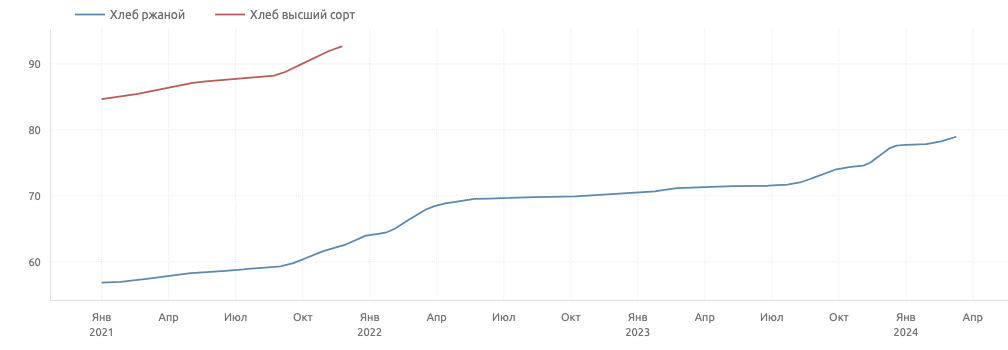

In [20]:
fig = pl_figure(figsize=(800, 350))

pl_plot(
    go.Scatter(
        x=smoothed(prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'], datetime_index=True).index,
        y=smoothed(prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'], datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[2], hoverinfo='skip',
        name='Хлеб ржаной'), fig)


pl_plot(
    go.Scatter(
        x=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'].index,
        y=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[2], showlegend=False, name='Хлеб ржаной'))

pl_plot(
    go.Scatter(
        x=smoothed(prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'], datetime_index=True).index,
        y=smoothed(prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'], datetime_index=True).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip',
        name='Хлеб высший сорт'), fig)


pl_plot(
    go.Scatter(
        x=prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].index,
        y=prices.loc[
            prices['хлеб и булочные изделия из пшеничной муки высшего сорта, кг'].notna(), 
            'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'],
        marker=dict(opacity=0, size=6),
        mode='markers', line_color=palette[1],
        showlegend=False, name='Хлеб высший сорт'))

fig.update_layout(
    hoverlabel=dict(
            bgcolor='rgba(255,255,255,0.85)',
            bordercolor='#C7C7C7',
            font=dict(color='#606060')),
)

fig.update_xaxes(
    tick0=prices['хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг'].index[0],
    dtick=86400000*31*3,
    tickformat="%b<br>%Y",
    labelalias=xtickaliases
)

fig.show(config=config)

### Execution time

In [15]:
stopwatch_stop(start)

Execution time: 0:00:01
